# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">  Building Image-to-Text Matching System Using Hugging Face Open-Source Models </center>


Building an image-to-text matching system using Hugging Face’s open-source models involves understanding several key concepts and steps. The process starts with an introduction to multimodal models, highlighting their importance and applications. It then focuses on the image-text retrieval task, discussing its relevance and challenges.

The guide details setting up the working environment, including installing necessary libraries and dependencies and explains the procedures for loading the model and processor using Hugging Face’s transformers library. It covers the preparation of image and text data to ensure correct processing and formatting for the model. Finally, it demonstrates how to perform image-text matching and interpret the results effectively.

By leveraging Hugging Face’s open-source models, the guide offers comprehensive insights into developing robust image-to-text matching systems, making it a valuable resource for researchers and practitioners in the field of multimodal AI.

#### <a id="top"></a>
# <div style="box-shadow: rgb(60, 121, 245) 0px 0px 0px 3px inset, rgb(255, 255, 255) 10px -10px 0px -3px, rgb(31, 193, 27) 10px -10px, rgb(255, 255, 255) 20px -20px 0px -3px, rgb(255, 217, 19) 20px -20px, rgb(255, 255, 255) 30px -30px 0px -3px, rgb(255, 156, 85) 30px -30px, rgb(255, 255, 255) 40px -40px 0px -3px, rgb(255, 85, 85) 40px -40px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(60, 121, 245);"><b>Table of contents</b></div>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:30px; font-size:15px; font-family: consolas;">
<ul>
    <li><a href="#1" target="_self" rel=" noreferrer nofollow">1. Introduction to Multimodal Models </a> </li>
    <li><a href="#2" target="_self" rel=" noreferrer nofollow">2. Introduction to Image-Text Retrieval Task </a></li>
    <li><a href="#3" target="_self" rel=" noreferrer nofollow">3. Setting Up Working Environment </a></li>
    <li><a href="#4" target="_self" rel=" noreferrer nofollow">4. Loading the Model and Processor </a></li>
    <li><a href="#5" target="_self" rel=" noreferrer nofollow">5. Preparing the Image and Text </a></li>
    <li><a href="#6" target="_self" rel=" noreferrer nofollow">6. Performing Image-Text Matching </a></li>
</ul>
</div>

***

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Introduction to Multimodal Models </b></div>



When a task requires a model to take more than one type of data, such as an image and a sentence, we call it multimodal. Multimodal models are designed to handle and integrate different forms of input, like text, images, audio, and even video, to perform a variety of tasks.

These models are increasingly important in applications that require a deep understanding of complex data, such as image captioning, visual question answering (VQA), and multimodal content creation.

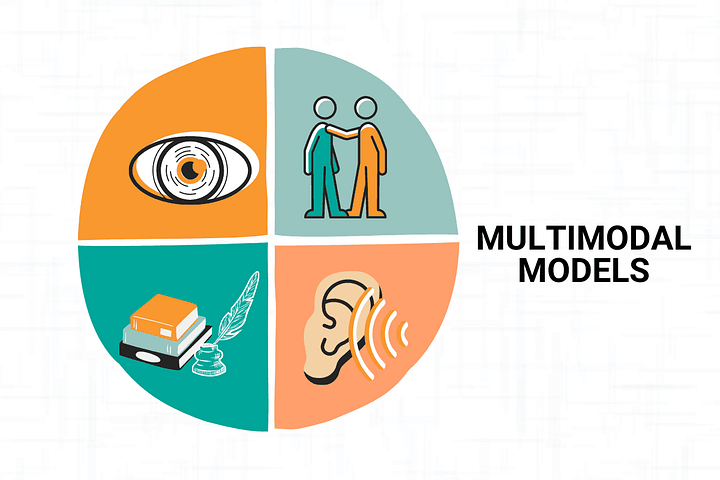

One prominent example of a multimodal model is ChatGPT with GPT-4. This model allows users to send text, images, and even audio, making it a versatile tool for a wide range of applications.

GPT-4 can understand and generate human-like text, and when enhanced with multimodal capabilities, it can also interpret images and audio, offering responses that are contextually relevant across different types of data.

* Multimodal models have numerous applications across various fields:
* Image Captioning: Generating descriptive captions for images by understanding the content within them.
* Visual Question Answering (VQA): Answering questions about the contents of an image by combining natural language processing with computer vision.
* Text-to-Image Generation: Creating images based on textual descriptions, useful in creative industries and design.
* Speech Recognition and Synthesis: Converting speech to text and vice versa, enhancing communication tools and accessibility.
* Augmented Reality (AR) and Virtual Reality (VR): Integrating multiple data types to create immersive and interactive experiences.



<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. Introduction to Image-Text Retrieval Task </b></div>

The Image-Text Retrieval task, also known as image-text matching, is a significant challenge in the field of computer vision and natural language processing (NLP). This task involves determining the relevance or similarity between an image and a piece of text.

It can be broadly divided into two subtasks: retrieving the most relevant images given a textual query (text-to-image retrieval) and retrieving the most relevant text descriptions given an image (image-to-text retrieval).
The model will output if the text matches the image. For example, if we pass a photo of a man and a dog and the input text is "the man in the blue shirt is wearing glasses," the model should return that the text does not match the image.

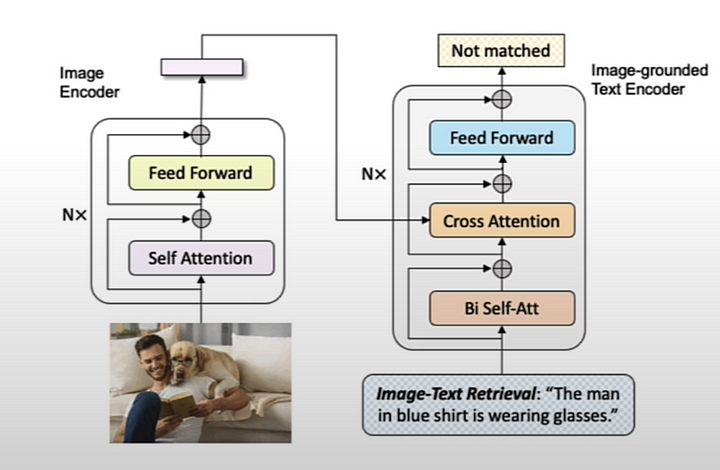

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3. Setting Up Working Environment </b></div>


Let's start by setting up the working environments. First, we will download the packages we will use in this article. We will download the Transformers package and the torch package to use Pytorch.

In [1]:
!pip install transformers torch -q

In [2]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.1
    Uninstalling transformers-4.45.1:
      Successfully uninstalled transformers-4.45.1


<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 4. Loading the Model and Processor </b></div>



We will need to load the model and the processor to perform the task. First, to load the model, we need to import the BleepForImageTextRetrieval class from the Transformers library.

Then, to load the model, you just need to call the class we imported and use the from_pretrained method to load the checkpoint. We will use the [Blip model from Salesforce](https://huggingface.co/Salesforce/blip-itm-base-coco) for this task, and this is the related checkpoint for this specific task.

In [3]:
from transformers import BlipForImageTextRetrieval

model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")  

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/895M [00:00<?, ?B/s]

As for the processor, it's practically the same. We need to import the AutoProcessor class from Transformers. To load the correct processor, we use the from_pretrained method and pass the related checkpoint. The processor's role is to process the image and the text for the model.

In [4]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("Salesforce/blip-itm-base-coco")

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/456 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

<a id="5"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 5. Preparing the Image and Text </b></div>


The next step is to get the image and the text that we will pass to the processor. The processor will modify the image and the text so the model can understand them.

For the image, we will load the image from a URL link. To load the image, we will use the Image class from the PIL library, which is installed by default when you install Python. We also need to import the requests library to perform an HTTP request to get the image.

This code downloads an image from the specified URL, opens it, retrieves the raw binary data, and converts it to the RGB color mode. Finally, we will print the raw image, you should be able to see the image.

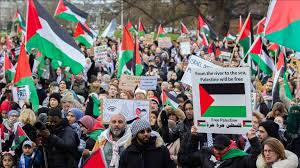

In [5]:
from PIL import Image
import requests

img_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzURjiEwhDZgRX8n6pgxlm2Pf0LZ6HIdQUIg&s'
raw_image =  Image.open(
    requests.get(img_url, stream=True).raw).convert('RGB')
raw_image

Now that we have the image, we will check if the model can successfully return that the image matches the following texts:

* Text 1: "Solidarity demonstrations for Palestine."
* Text 2: "Solidarity demonstrations for Israel"
* Text 3: "A man plays with his dog on the beach"

In [6]:
text_1 = "Solidarity demonstrations for Palestine"
text_2 = "Solidarity demonstrations for Israel"
text_3 = "A man plays with his dog on the beach"

We will use three different texts to see how the model will understand. We can expect that the first text will get the highest probability and the second will get also a high probability but lower than the first one. The third text should get a very low probability.

<a id="6"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 6. Preparing the Image and Text </b></div>

First, we need to get the inputs that the model can understand. To do that, we need to call the processor and pass a few arguments: the image, the text, and return_tensors set to 'pt' for PyTorch so that we get a PyTorch tensor at the end.

In [7]:
inputs = processor(images=raw_image,
                   text=text_1,
                   return_tensors="pt")

Let's print the inputs to see what it looks like. As you can see, we have a dictionary of multiple arguments: pixel values, input IDs, and the attention mask. Now we have everything.

In [8]:
inputs

{'pixel_values': tensor([[[[-3.6162e-01, -8.4247e-02,  2.2232e-01,  ...,  1.5508e+00,
            1.5508e+00,  1.5654e+00],
          [-2.7403e-01, -2.5853e-02,  2.8071e-01,  ...,  1.6092e+00,
            1.6092e+00,  1.6238e+00],
          [-1.1344e-01,  1.3473e-01,  4.2670e-01,  ...,  1.7406e+00,
            1.7406e+00,  1.7406e+00],
          ...,
          [-1.2229e+00, -1.1061e+00, -1.1937e+00,  ..., -1.2959e+00,
           -1.3689e+00, -1.3397e+00],
          [-1.3689e+00, -8.2877e-01, -7.2658e-01,  ..., -1.5149e+00,
           -1.3689e+00, -1.4127e+00],
          [-1.4273e+00, -7.1198e-01, -5.3680e-01,  ..., -1.6025e+00,
           -1.3689e+00, -1.4419e+00]],

         [[-2.8134e-01,  3.8118e-03,  3.3398e-01,  ..., -3.1135e-01,
           -3.1135e-01, -2.9634e-01],
          [-1.9129e-01,  6.3843e-02,  3.9401e-01,  ..., -2.5132e-01,
           -2.5132e-01, -2.3631e-01],
          [-2.6204e-02,  2.1392e-01,  5.2908e-01,  ..., -1.1625e-01,
           -1.1625e-01, -1.0124e-01],
   

As you can see, these numbers don't mean anything yet because they are the logits of the model. To convert these values into something we can understand, we need to pass them into a softmax layer.
The output of this softmax layer will give us the probability. To get the softmax layer, we need to import the torch. Then we need to pass the scores into the softmax layer.

In [9]:
import torch
itm_scores = model(**inputs)[0]
itm_score = torch.nn.functional.softmax(
    itm_scores,dim=1)
itm_score

model.safetensors:   0%|          | 0.00/895M [00:00<?, ?B/s]

tensor([[0.0031, 0.9969]], grad_fn=<SoftmaxBackward0>)

Now this number makes more sense. The first value is the probability that the image and text are not matched, and the second one is the probability that they are matched. The value, it shows that indeed the text and the image are matched with a probability of 99%.

In [10]:
print(f"""\
The image and text_1 are matched \
with a probability of {itm_score[0][1]:.4f}""")

The image and text_1 are matched with a probability of 0.9969


Let's repeat the same steps for the second and the third and compare the probabilities

In [11]:
inputs = processor(images=raw_image,
                   text=text_2,
                   return_tensors="pt")

itm_scores = model(**inputs)[0]
itm_score = torch.nn.functional.softmax(
    itm_scores,dim=1)
itm_score

tensor([[0.2821, 0.7179]], grad_fn=<SoftmaxBackward0>)

In [12]:
print(f"""\
The image and text_2 are matched \
with a probability of {itm_score[0][1]:.4f}""")

The image and text_2 are matched with a probability of 0.7179


In [13]:
inputs = processor(images=raw_image,
                   text=text_3,
                   return_tensors="pt")

itm_scores = model(**inputs)[0]
itm_score = torch.nn.functional.softmax(
    itm_scores,dim=1)
itm_score

tensor([[9.9999e-01, 1.1241e-05]], grad_fn=<SoftmaxBackward0>)

In [14]:
print(f"""\
The image and text_3 are matched \
with a probability of {itm_score[0][1]:.4f}""")

The image and text_3 are matched with a probability of 0.0000
